This Data Set is an Electric  Consumption AC

1. **ID**: A unique identifier for each air conditioner unit.
2. **Type_of_AC**: The type of air conditioner (e.g., Split, Window, Portable).
3. **Model**: The model name or number of the air conditioner.
4. **Cooling_Capacity**: The cooling capacity of the air conditioner (measured in some unit, not specified in the table).
5. **Avg_Temp**: The average temperature (presumably ambient temperature) associated with the air conditioner.
6. **Room_Size**: The size of the room where the air conditioner is installed.
7. **Num_People**: The number of people typically present in the room.
8. **Star_Rating**: The star rating or energy efficiency rating of the air conditioner.
9. **Age_of_Unit**: The age of the air conditioning unit.
10. **Maintenance**: A binary value (0 or 1) indicating whether maintenance has been performed on the unit.
11. **Avg_Usage**: The average usage of the air conditioner.
12. **Avg_AC_Temp**: The average temperature set on the air conditioner.
13. **City**: The city where the air conditioner is located.
14. **Input_Power**: The input power (presumably electrical power) required by the air conditioner.
15. **Electricity_Consumption_AC**: The electricity consumption of the air conditioner.

**Problem**: Try to find a best model That can work on to Predict the electricity consumption

**Implemented** LinearRegression, GradientBoostingRegressor, SVR, RandomForestRegressor.


In [1]:
import pandas as pd
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Define the file path
file_path = '/content/drive/MyDrive/Data_set/Electricity_Consumption_AC.csv'

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
data.head()

,ID,Type_of_AC,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power,Electricity_Consumption_AC
0,795823,Split,1.5,6579.15,43,1873.5,3,3.0,5.0,0,1.720,31.333333,Cairo,2863.2952214614106,1.924
1,506848,Window,1.1,6775.44,46,1603.8000000000002,4,4.0,1.0,0,18.000,29.500000,Bucharest,2783.3096980924593,1.341
2,441027,Portable,3.8,6995.22,29,4807.0,38,4.0,1.0,0,0.551,13.763158,Berlin,2882.6064181342504,2.702
3,160677,Window,1.2,1863.68,39,1466.3999999999999,10,4.0,0.0,0,19.540,22.900000,Cape Town,2607.0895663486162,1.541
4,902932,Window,NaN,3089.04,40,3139.4,9,5.0,4.0,0,16.760,18.444444,Berlin,2681.3591611159786,2.182


Type_of_AC

In [7]:

data['Type_of_AC'].value_counts()

Portable    3786
Ducted      3779
Window      3733
Split       3702
Name: Type_of_AC, dtype: int64

In [8]:
data['Type_of_AC'].describe()

count        15000
unique           4
top       Portable
freq          3786
Name: Type_of_AC, dtype: object

In [9]:
data['Type_of_AC'].isnull().sum()

0

In [10]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Type_of_AC'] = le.fit_transform(data['Type_of_AC'])

data.head()

,ID,Type_of_AC,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power,Electricity_Consumption_AC
0,795823,2,1.5,6579.15,43,1873.5,3,3.0,5.0,0,1.720,31.333333,Cairo,2863.2952214614106,1.924
1,506848,3,1.1,6775.44,46,1603.8000000000002,4,4.0,1.0,0,18.000,29.500000,Bucharest,2783.3096980924593,1.341
2,441027,1,3.8,6995.22,29,4807.0,38,4.0,1.0,0,0.551,13.763158,Berlin,2882.6064181342504,2.702
3,160677,3,1.2,1863.68,39,1466.3999999999999,10,4.0,0.0,0,19.540,22.900000,Cape Town,2607.0895663486162,1.541
4,902932,3,NaN,3089.04,40,3139.4,9,5.0,4.0,0,16.760,18.444444,Berlin,2681.3591611159786,2.182


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          15000 non-null  int64  
 1   Type_of_AC                  15000 non-null  object 
 2   Model                       14130 non-null  float64
 3   Cooling_Capacity            15000 non-null  float64
 4   Avg_Temp                    15000 non-null  int64  
 5   Room_SIze                   13983 non-null  object 
 6   Num_People                  15000 non-null  int64  
 7   Star_Rating                 14103 non-null  object 
 8   Age_of_Unit                 14018 non-null  float64
 9   Maintenance                 15000 non-null  int64  
 10  Avg_Usage                   15000 non-null  float64
 11  Avg_AC_Temp                 15000 non-null  float64
 12  City                        13506 non-null  object 
 13  Input_Power                 142

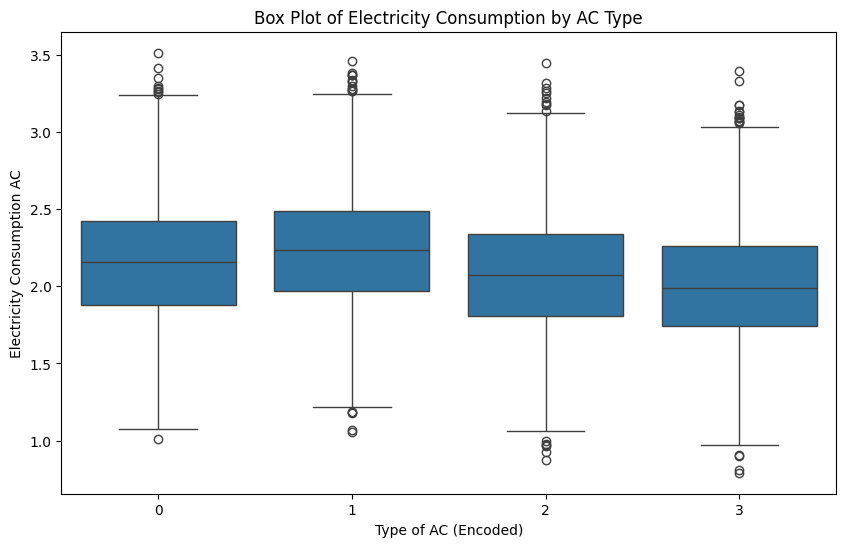

Correlation with Electricity_Consumption_AC:
ID                           -0.004102
Type_of_AC                   -0.176634
Model                         0.280364
Cooling_Capacity              0.313614
Avg_Temp                      0.255194
Num_People                    0.263947
Age_of_Unit                   0.219959
Maintenance                   0.211604
Avg_Usage                     0.162492
Avg_AC_Temp                  -0.160030
Electricity_Consumption_AC    1.000000
Name: Electricity_Consumption_AC, dtype: float64


<ipython-input-11-4b86fdd052a9>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# categorical column in your DataFrame
le = LabelEncoder()
data['Type_of_AC'] = le.fit_transform(data['Type_of_AC'])

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type_of_AC', y='Electricity_Consumption_AC', data=data)
plt.title('Box Plot of Electricity Consumption by AC Type')
plt.xlabel('Type of AC (Encoded)')
plt.ylabel('Electricity Consumption AC')
plt.show()

# Correlation
correlation_matrix = data.corr()
correlation_with_electricity = correlation_matrix['Electricity_Consumption_AC']

print("Correlation with Electricity_Consumption_AC:")
print(correlation_with_electricity)


Model

In [12]:

# Assuming df is your DataFrame
# Check for null values in the 'Model' column
data['Model'].isnull().count()



15000

In [13]:

# Get value counts of unique values in the 'Model' column
data['Model'].value_counts()

3.7     502
1.3     492
3.3     491
2.0     479
2.6     476
1.0     474
3.2     472
2.1     468
1.5     461
2.3     457
1.6     456
3.8     452
1.1     451
1.7     450
1.4     448
3.1     447
2.9     447
2.8     445
3.4     445
3.9     442
3.0     441
2.5     438
2.7     438
3.5     437
2.4     433
3.6     429
1.9     428
1.8     427
1.2     424
2.2     423
12.8     24
14.0     23
12.0     22
12.4     22
13.2     21
13.6     21
6.0      21
14.4     20
4.4      20
14.8     19
9.6      19
5.2      19
4.8      19
10.4     19
9.2      19
15.2     19
10.8     19
15.6     19
11.2     19
8.0      18
8.8      18
7.2      17
6.8      17
6.4      17
10.0     16
4.0      15
8.4      15
11.6     14
7.6      13
5.6      13
Name: Model, dtype: int64

In [14]:
# count the values ehat are null in the feacture
data['Model'].isnull().sum()

870

In [15]:

# 'data' is your DataFrame
# Replace 'Model' with the actual column name if it's different
column_name = 'Model'

# Calculate the median value
median_value = data[column_name].median()

# Replace null values with the median value
data[column_name].fillna(median_value, inplace=True)

# Check the count of null values after replacement
print(data[column_name].isnull().sum())

0


Cooling_Capacity

In [16]:
data['Cooling_Capacity']

0        6579.15
1        6775.44
2        6995.22
3        1863.68
4        3089.04
          ...   
14995    6216.96
14996    1910.04
14997    3587.36
14998    2294.25
14999    7927.20
Name: Cooling_Capacity, Length: 15000, dtype: float64

In [17]:
data['Cooling_Capacity'].isnull().sum()

0

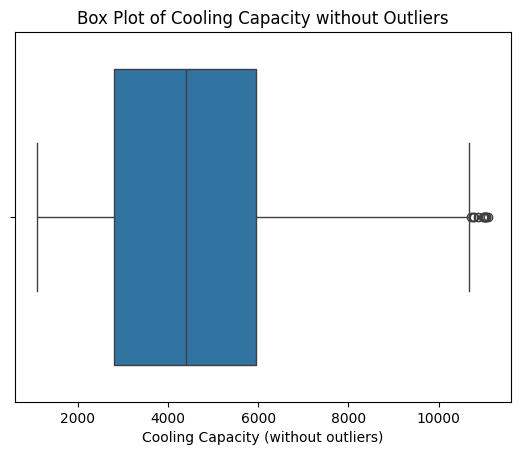

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


cooling_capacity_data = data['Cooling_Capacity']

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = cooling_capacity_data.quantile(0.25)
Q3 = cooling_capacity_data.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out values that are considered outliers
filtered_data = cooling_capacity_data[(cooling_capacity_data >= lower_bound) & (cooling_capacity_data <= upper_bound)]

# Using Seaborn for a box plot with filtered data
sns.boxplot(x=filtered_data)

# Adding labels and title
plt.xlabel('Cooling Capacity (without outliers)')
plt.title('Box Plot of Cooling Capacity without Outliers')

# Show the plot
plt.show()

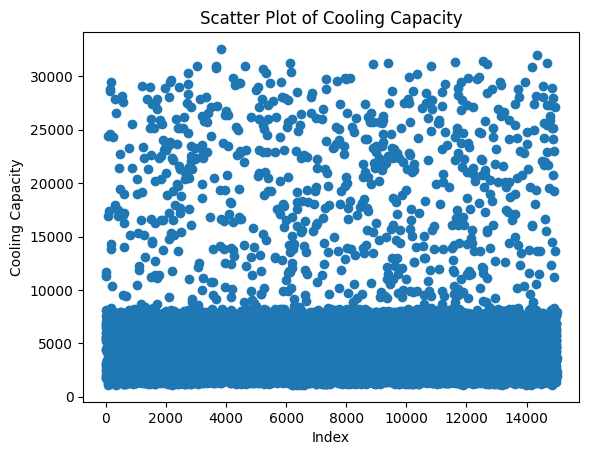

In [19]:
plt.scatter(range(len(data['Cooling_Capacity'])), data['Cooling_Capacity'])
plt.title('Scatter Plot of Cooling Capacity')
plt.xlabel('Index')
plt.ylabel('Cooling Capacity')
plt.show()

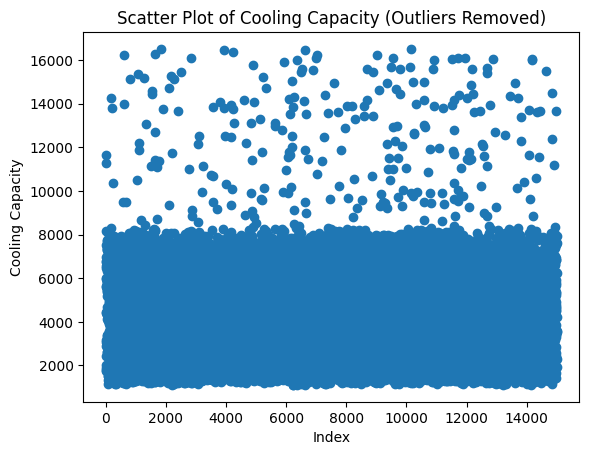

In [20]:
import numpy as np
# Assuming 'Cooling_Capacity' is the column name in your dataset
cooling_capacity = data['Cooling_Capacity']

# Calculate the z-scores to identify outliers
z_scores = (cooling_capacity - cooling_capacity.median()) / cooling_capacity.std()

# Define a threshold for outliers (e.g., z-score greater than 3 or less than -3)
outlier_threshold = 3

# Identify and replace outliers with the median
data['Cooling_Capacity'] = np.where(np.abs(z_scores) > outlier_threshold, cooling_capacity.median(), cooling_capacity)

# Plot the scatter plot after removing outliers
plt.scatter(range(len(data['Cooling_Capacity'])), data['Cooling_Capacity'])
plt.title('Scatter Plot of Cooling Capacity (Outliers Removed)')
plt.xlabel('Index')
plt.ylabel('Cooling Capacity')
plt.show()

# In this code:
# Z-scores are calculated to identify outliers. Z-score is a measure of how many standard deviations a data point is from the mean.
# An outlier threshold is defined (e.g., 3 standard deviations), and data points beyond this threshold are replaced with the median of the original data.
# After running this code, the scatter plot will show the Cooling Capacity with outliers replaced by the median. Adjust the outlier_threshold value based on your specific requirements.

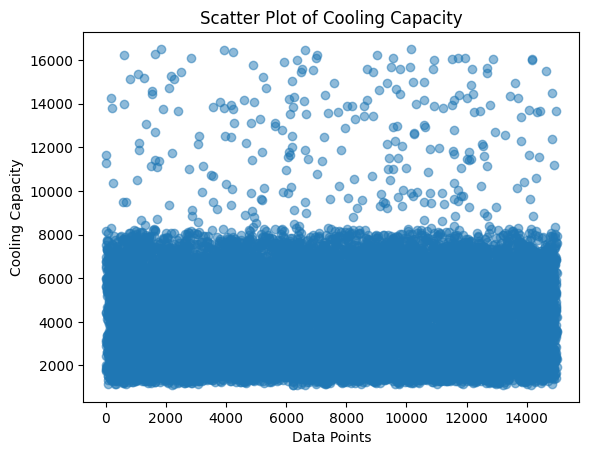

In [21]:

# Assuming 'Cooling_Capacity' is a column in your dataset
cooling_capacity = data['Cooling_Capacity']

# Create a scatter plot
plt.scatter(range(len(cooling_capacity)), cooling_capacity, alpha=0.5)

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Cooling Capacity')
plt.title('Scatter Plot of Cooling Capacity')

# Show the plot
plt.show()

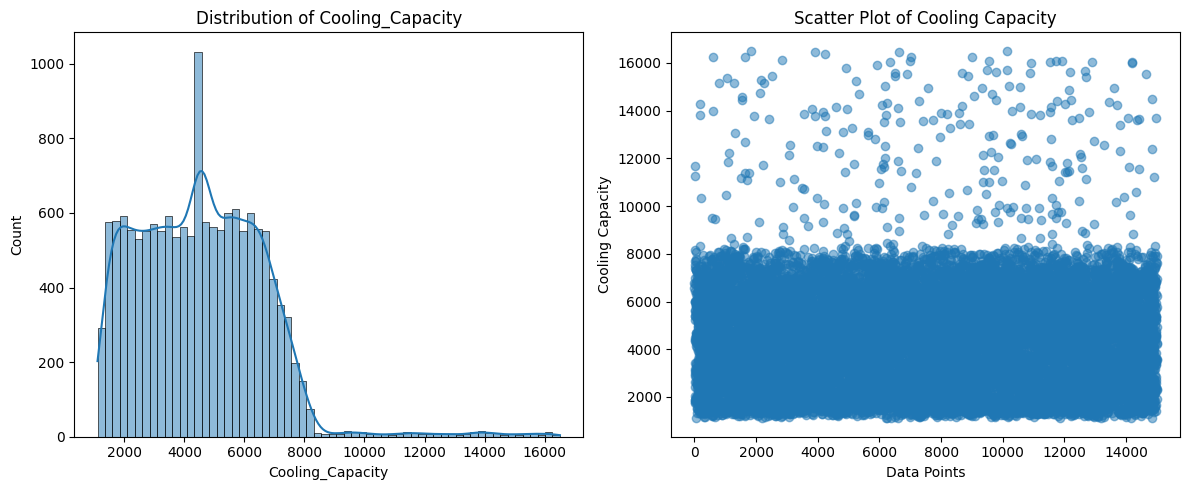

In [22]:

# Assuming 'Cooling_Capacity' is a column in your dataset
cooling_capacity = data['Cooling_Capacity']

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram on the first subplot
sns.histplot(cooling_capacity, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Cooling_Capacity')

# Plot scatter plot on the second subplot
axes[1].scatter(range(len(cooling_capacity)), cooling_capacity, alpha=0.5)
axes[1].set_xlabel('Data Points')
axes[1].set_ylabel('Cooling Capacity')
axes[1].set_title('Scatter Plot of Cooling Capacity')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

Avg_Temp

In [23]:

# Check for null values
null_values = data['Avg_Temp'].isnull().sum()
print(f"Number of null values in Avg_Temp: {null_values}")

# Replace null values with the median
median_value = data['Avg_Temp'].median()
data['Avg_Temp'].fillna(median_value, inplace=True)

Number of null values in Avg_Temp: 0


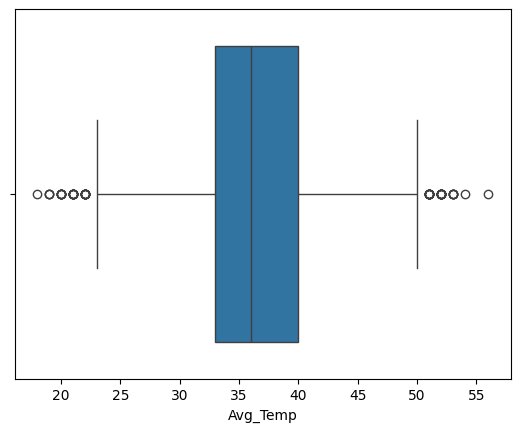

In [24]:

# Check for outliers using box plot
sns.boxplot(x=data['Avg_Temp'])
plt.show()

# Identify outliers using z-scores
z_scores = (data['Avg_Temp'] - data['Avg_Temp'].mean()) / data['Avg_Temp'].std()

# Define a threshold for outliers, e.g., z_score > 3 or z_score < -3
outliers = data[abs(z_scores) > 3]

# Remove outliers
data = data[abs(z_scores) <= 3]

count    14959.000000
mean        36.462598
std          4.942326
min         22.000000
25%         33.000000
50%         36.000000
75%         40.000000
max         51.000000
Name: Avg_Temp, dtype: float64


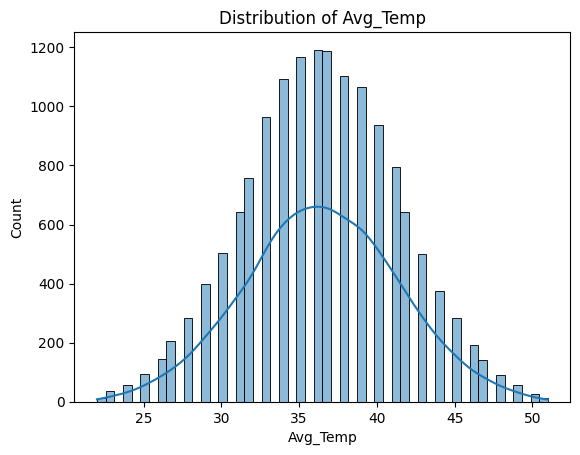

Correlation with Avg_Temp:
 Avg_Temp                      1.000000
Electricity_Consumption_AC    0.253834
Avg_Usage                     0.156874
Avg_AC_Temp                   0.099797
Type_of_AC                    0.005565
Model                         0.004347
Num_People                    0.001778
Age_of_Unit                   0.001517
ID                            0.000945
Maintenance                  -0.006750
Cooling_Capacity             -0.017725
Name: Avg_Temp, dtype: float64


<ipython-input-25-aabdac06b0ca>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [25]:
# Statistical summary of the 'Avg_Temp' feature
print(data['Avg_Temp'].describe())

# Visualize the distribution of 'Avg_Temp'
sns.histplot(data['Avg_Temp'], kde=True)
plt.title('Distribution of Avg_Temp')
plt.show()

# Correlation analysis with other features
correlation_matrix = data.corr()
correlation_with_avg_temp = correlation_matrix['Avg_Temp'].sort_values(ascending=False)
print("Correlation with Avg_Temp:\n", correlation_with_avg_temp)

In [26]:

# Rename the column
data.rename(columns={'Room_SIze': 'Room_Size'}, inplace=True)

# Now 'Room_SIze' is changed to 'Room_Size'
data.head()


,ID,Type_of_AC,Model,Cooling_Capacity,Avg_Temp,Room_Size,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power,Electricity_Consumption_AC
0,795823,2,1.5,6579.15,43,1873.5,3,3.0,5.0,0,1.720,31.333333,Cairo,2863.2952214614106,1.924
1,506848,3,1.1,6775.44,46,1603.8000000000002,4,4.0,1.0,0,18.000,29.500000,Bucharest,2783.3096980924593,1.341
2,441027,1,3.8,6995.22,29,4807.0,38,4.0,1.0,0,0.551,13.763158,Berlin,2882.6064181342504,2.702
3,160677,3,1.2,1863.68,39,1466.3999999999999,10,4.0,0.0,0,19.540,22.900000,Cape Town,2607.0895663486162,1.541
4,902932,3,2.5,3089.04,40,3139.4,9,5.0,4.0,0,16.760,18.444444,Berlin,2681.3591611159786,2.182


In [27]:
data['Room_Size'].isnull().sum()


1010

In [28]:

# Identify non-numeric values in 'Room_Size'
non_numeric_values = pd.to_numeric(data['Room_Size'], errors='coerce').isnull()

# Print the non-numeric values
print(data['Room_Size'][non_numeric_values])

# Convert 'Room_Size' to numeric, coercing errors to NaN
data['Room_Size'] = pd.to_numeric(data['Room_Size'], errors='coerce')

# Calculate the median of 'Room_Size' excluding null values
median_room_size = data['Room_Size'].median()

# Replace null values with the median
data['Room_Size'].fillna(median_room_size, inplace=True)

# Check the number of null values after replacement
print(data['Room_Size'].isnull().sum())

28       NaN
42       NaN
80       NaN
91       NaN
106      NaN
        ... 
14924    NaN
14938    NaN
14953    NaN
14958    NaN
14964    NaN
Name: Room_Size, Length: 1026, dtype: object
0


In [29]:
data.head()

,ID,Type_of_AC,Model,Cooling_Capacity,Avg_Temp,Room_Size,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power,Electricity_Consumption_AC
0,795823,2,1.5,6579.15,43,1873.5,3,3.0,5.0,0,1.720,31.333333,Cairo,2863.2952214614106,1.924
1,506848,3,1.1,6775.44,46,1603.8,4,4.0,1.0,0,18.000,29.500000,Bucharest,2783.3096980924593,1.341
2,441027,1,3.8,6995.22,29,4807.0,38,4.0,1.0,0,0.551,13.763158,Berlin,2882.6064181342504,2.702
3,160677,3,1.2,1863.68,39,1466.4,10,4.0,0.0,0,19.540,22.900000,Cape Town,2607.0895663486162,1.541
4,902932,3,2.5,3089.04,40,3139.4,9,5.0,4.0,0,16.760,18.444444,Berlin,2681.3591611159786,2.182


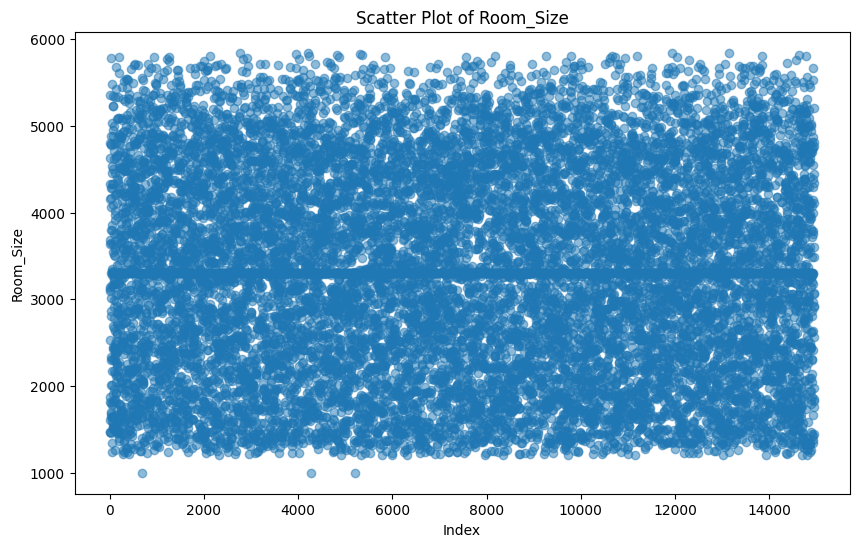

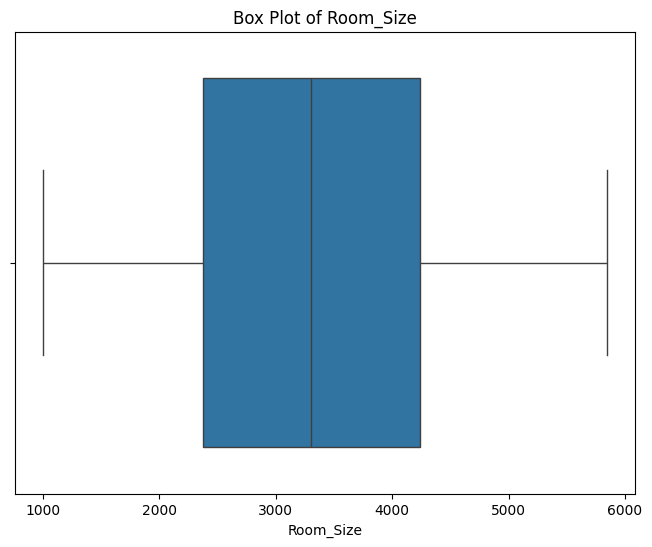

In [30]:

# Assuming 'Room_Size' is a column in your DataFrame
room_size_data = data['Room_Size']

# Replace outliers with values within the range [1000, 6000]
room_size_data = np.clip(room_size_data, 1000, 6000)

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(x=range(len(room_size_data)), y=room_size_data, alpha=0.5)
plt.title('Scatter Plot of Room_Size')
plt.xlabel('Index')
plt.ylabel('Room_Size')
plt.show()

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=room_size_data)
plt.title('Box Plot of Room_Size')
plt.xlabel('Room_Size')
plt.show()

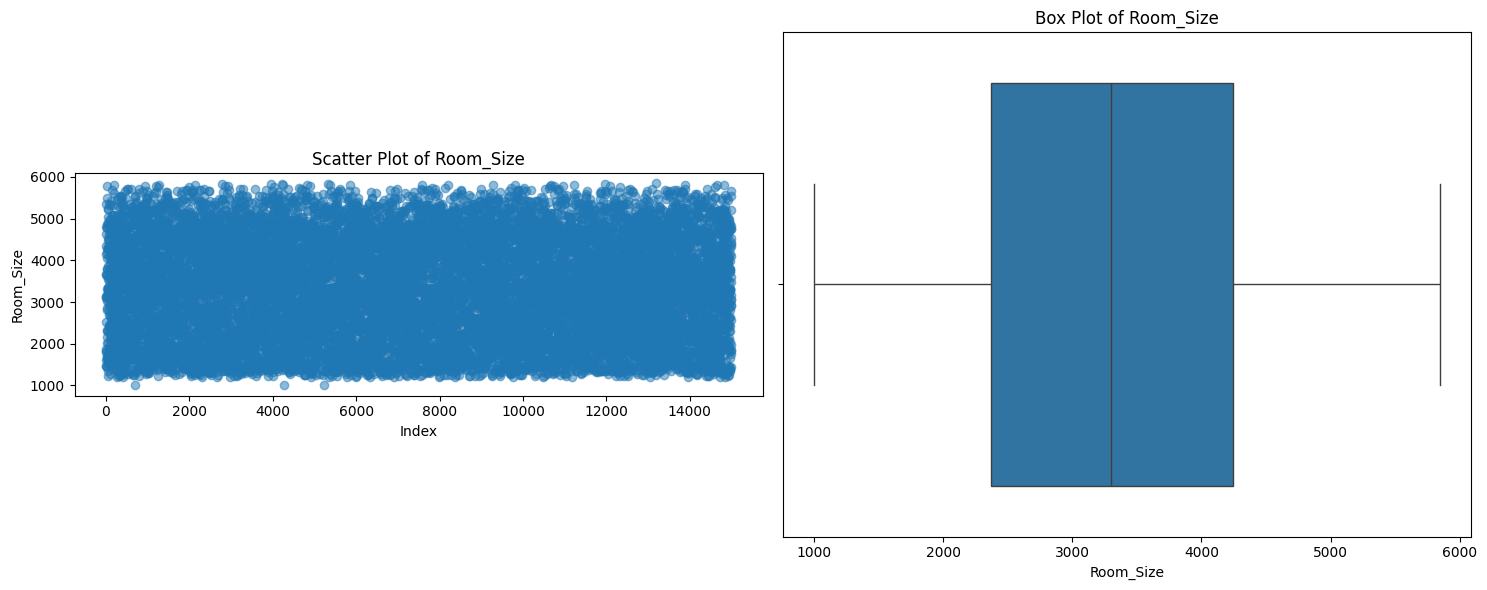

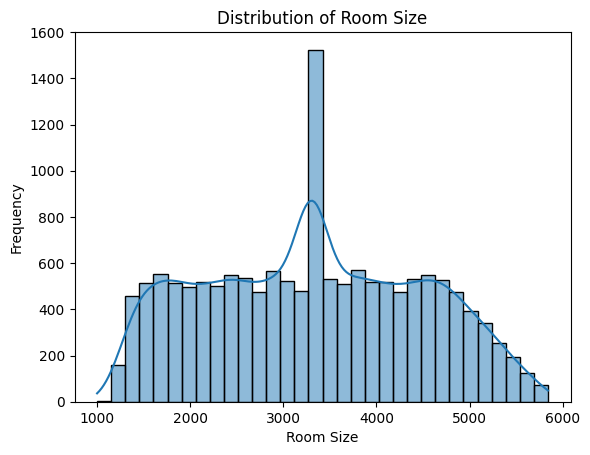

In [31]:

# Clip values between 1000 and 6000
data['Room_Size'] = np.clip(data['Room_Size'], 1000, 6000)

room_size_data = data['Room_Size']

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter Plot
ax1.scatter(x=room_size_data.index, y=room_size_data, alpha=0.5)
ax1.set_title('Scatter Plot of Room_Size')
ax1.set_xlabel('Index')
ax1.set_ylabel('Room_Size')
ax1.set_aspect('equal')  # Set aspect ratio

# Box Plot
sns.boxplot(x=room_size_data, ax=ax2, orient='h')  # Horizontal box plot
ax2.set_title('Box Plot of Room_Size')
ax2.set_xlabel('Room_Size')
ax2.set_ylabel('')  # Clear y-axis label for box plot

plt.tight_layout()  # Adjust layout
plt.show()



# Create a histogram using Seaborn
sns.histplot(data['Room_Size'], kde=True)
plt.xlabel('Room Size')
plt.ylabel('Frequency')
plt.title('Distribution of Room Size')
plt.show()

Num_People

In [32]:

# Assuming 'data' is your DataFrame
# Check for null values
null_values = data['Num_People'].isnull().sum()

# Replace null values with a desired value (e.g., mean, median, or a specific value)
mean_value = data['Num_People'].mean()
data['Num_People'].fillna(mean_value, inplace=True)

# Verify if null values have been replaced
updated_null_values = data['Num_People'].isnull().sum()
print(f"Null values before: {null_values}, Null values after: {updated_null_values}")

Null values before: 0, Null values after: 0


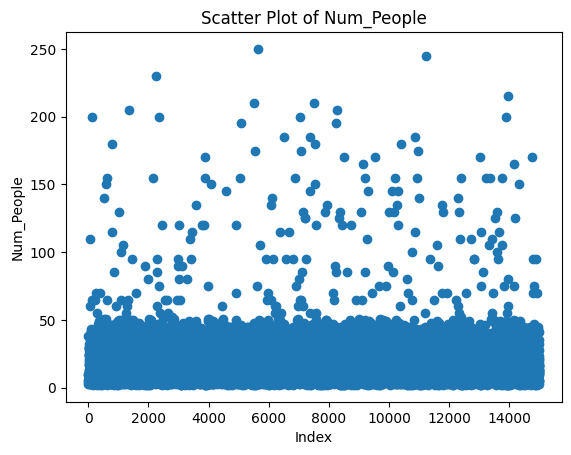

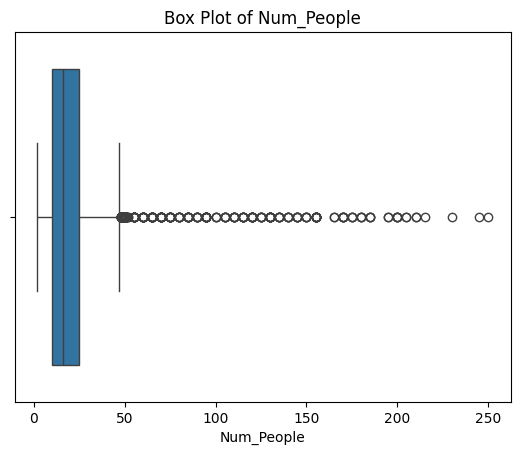

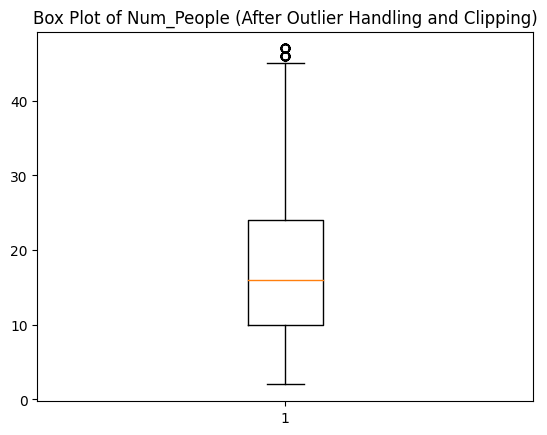

In [33]:


# Your existing scatter plot code
plt.scatter(data.index, data['Num_People'])
plt.title('Scatter Plot of Num_People')
plt.xlabel('Index')
plt.ylabel('Num_People')
plt.show()

# Your existing box plot code
sns.boxplot(x=data['Num_People'])
plt.title('Box Plot of Num_People')
plt.show()

# Identify and replace outliers
Q1 = data['Num_People'].quantile(0.25)
Q3 = data['Num_People'].quantile(0.75)
IQR = Q3 - Q1

# Replace values outside 1.5 times the IQR with NaN or a specific value
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = min(100, Q3 + 1.5 * IQR)

outliers = (data['Num_People'] < lower_bound) | (data['Num_People'] > upper_bound)
data.loc[outliers, 'Num_People'] = mean_value  # Replace outliers with mean value, for example

# Clip values to be within [0, 100]
data['Num_People'] = data['Num_People'].clip(0, 100)

# Verify if outliers have been replaced and values are clipped
plt.boxplot(data['Num_People'])
plt.title('Box Plot of Num_People (After Outlier Handling and Clipping)')
plt.show()

In [34]:
# Star_Rating	Age_of_Unit	Maintenance	Avg_Usage	Avg_AC_Temp

In [35]:

data['Star_Rating'] = pd.to_numeric(data['Star_Rating'], errors='coerce')  # Coerce to replace invalid literals with NaN
data['Age_of_Unit'] = pd.to_numeric(data['Age_of_Unit'], errors='coerce')
data['Maintenance'] = pd.to_numeric(data['Maintenance'], errors='coerce')
data['Avg_Usage'] = pd.to_numeric(data['Avg_Usage'], errors='coerce')
data['Avg_AC_Temp'] = pd.to_numeric(data['Avg_AC_Temp'], errors='coerce')

In [36]:

features_to_fill = ['Star_Rating', 'Age_of_Unit', 'Maintenance', 'Avg_Usage', 'Avg_AC_Temp']

for feature in features_to_fill:
    median_value = data[feature].median()
    data[feature].fillna(median_value, inplace=True)


In [37]:

from scipy import stats

In [38]:

# Drop rows where 'Star_Rating' column contains -1.000000e+10
data = data[data['Star_Rating'] != -1.000000e+10]

# Check the value counts after dropping the rows
print(data['Star_Rating'].value_counts())

4.0    7680
5.0    4408
3.0    1932
2.0     768
1.0     170
Name: Star_Rating, dtype: int64


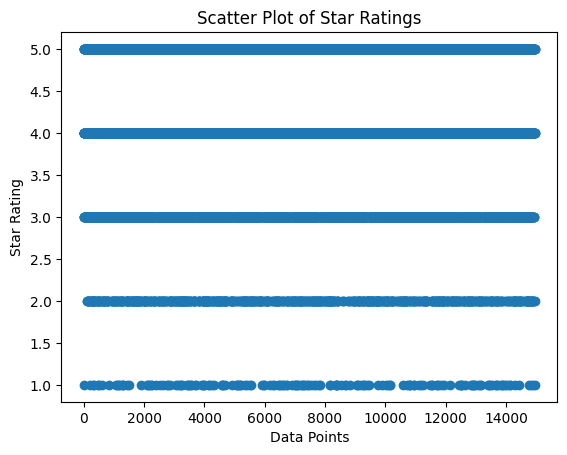

In [39]:

# Scatter plot for 'Star_Rating'
plt.scatter(range(len(data['Star_Rating'])), data['Star_Rating'])
plt.title('Scatter Plot of Star Ratings')
plt.xlabel('Data Points')
plt.ylabel('Star Rating')
plt.show()

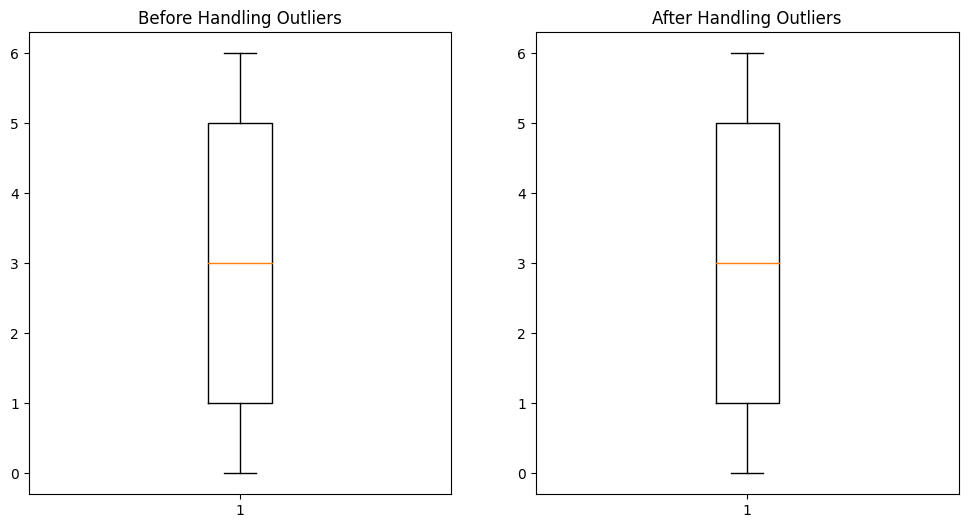

In [40]:

# Step 1: Identify and remove outliers
Q1 = data['Age_of_Unit'].quantile(0.25)
Q3 = data['Age_of_Unit'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data[(data['Age_of_Unit'] >= lower_bound) & (data['Age_of_Unit'] <= upper_bound)]

# Step 2: Replace outliers with relevant data (mean, median, or another appropriate value)
data['Age_of_Unit'] = np.where(
    (data['Age_of_Unit'] < lower_bound) | (data['Age_of_Unit'] > upper_bound),
    filtered_data['Age_of_Unit'].mean(),  # You can replace 'mean()' with 'median()' or any other relevant value
    data['Age_of_Unit']
)

# Step 3: Plot the data before and after handling outliers
plt.figure(figsize=(12, 6))

# Before handling outliers
plt.subplot(1, 2, 1)
plt.boxplot(data['Age_of_Unit'])
plt.title('Before Handling Outliers')

# After handling outliers
plt.subplot(1, 2, 2)
plt.boxplot(filtered_data['Age_of_Unit'])
plt.title('After Handling Outliers')

plt.show()

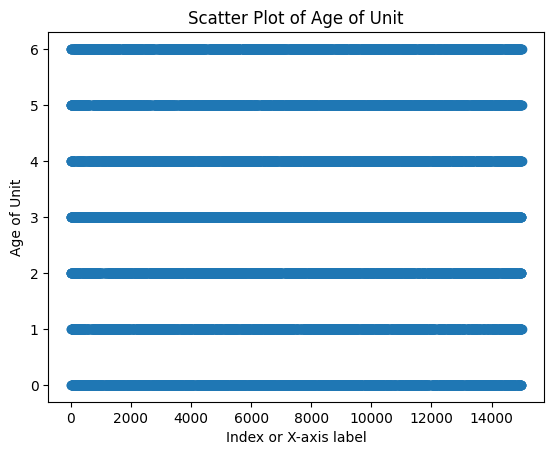

In [41]:

# Scatter plot
plt.scatter(data.index, data['Age_of_Unit'])

# Adding labels and title
plt.xlabel('Index or X-axis label')
plt.ylabel('Age of Unit')
plt.title('Scatter Plot of Age of Unit')

# Show the plot
plt.show()

In [42]:

# List of values to remove
values_to_remove = ['__', '?', '-10e9', '$$', '.', 'blank', '1k']

# Removing rows with specified values in the 'City' column
data = data[~data['City'].isin(values_to_remove)]

In [43]:
data['City'].value_counts()

Berlin       1902
Sao Paolo    1797
Moscow       1537
Mumbai       1236
Bucharest    1182
Tokyo        1085
Delhi         993
Geneva        755
Cape Town     740
Seoul         734
New York      724
Cairo         556
Prague        198
Name: City, dtype: int64

In [44]:

# Create a mapping dictionary
city_mapping = {
    'Berlin': 1,
    'Sao Paolo': 2,
    'Moscow': 3,
    'Mumbai': 4,
    'Bucharest': 5,
    'Tokyo': 6,
    'Delhi': 7,
    'Geneva': 8,
    'Cape Town': 9,
    'Seoul': 10,
    'New York': 11,
    'Cairo': 12,
    'Prague': 13
}

# Map the cities to numeric values
data['City'] = data['City'].map(city_mapping)


In [45]:
data.head()

,ID,Type_of_AC,Model,Cooling_Capacity,Avg_Temp,Room_Size,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power,Electricity_Consumption_AC
0,795823,2,1.5,6579.15,43,1873.5,3.0,3.0,5.0,0,1.720,31.333333,12.0,2863.2952214614106,1.924
1,506848,3,1.1,6775.44,46,1603.8,4.0,4.0,1.0,0,18.000,29.500000,5.0,2783.3096980924593,1.341
2,441027,1,3.8,6995.22,29,4807.0,38.0,4.0,1.0,0,0.551,13.763158,1.0,2882.6064181342504,2.702
3,160677,3,1.2,1863.68,39,1466.4,10.0,4.0,0.0,0,19.540,22.900000,9.0,2607.0895663486162,1.541
4,902932,3,2.5,3089.04,40,3139.4,9.0,5.0,4.0,0,16.760,18.444444,1.0,2681.3591611159786,2.182


In [46]:


# Convert 'Input_Power' column to integer
data['Input_Power'] = pd.to_numeric(data['Input_Power'], errors='coerce').astype('float64')

# Check if any column has string values
if any(data.dtypes == 'object'):
    print("DataFrame contains string values in at least one column.")


In [47]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming 'data' is your original DataFrame
# Extract the columns to be scaled
columns_to_scale = data.columns.difference(['Electricity_Consumption_AC', 'ID'])

# Create a new DataFrame with the scaled values
scaled_data = pd.DataFrame(data.copy())
scaled_data[columns_to_scale] = MinMaxScaler().fit_transform(data[columns_to_scale])

# Display the first few rows of the scaled data
scaled_data.head()

,ID,Type_of_AC,Model,Cooling_Capacity,Avg_Temp,Room_Size,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power,Electricity_Consumption_AC
0,795823,0.666667,0.034247,0.355161,0.724138,0.180393,0.022222,0.50,0.833333,0.0,0.086017,0.682627,0.916667,1.0,1.924
1,506848,1.000000,0.006849,0.367905,0.827586,0.124695,0.044444,0.75,0.166667,0.0,0.900180,0.622435,0.333333,1.0,1.341
2,441027,0.333333,0.191781,0.382175,0.241379,0.786213,0.800000,0.75,0.166667,0.0,0.027556,0.105767,0.000000,1.0,2.702
3,160677,1.000000,0.013699,0.049010,0.586207,0.096320,0.177778,0.75,0.000000,0.0,0.977195,0.405746,0.666667,1.0,1.541
4,902932,1.000000,0.102740,0.128567,0.620690,0.441824,0.155556,1.00,0.666667,0.0,0.838168,0.259462,0.000000,1.0,2.182


In [48]:

cov_matrix = scaled_data.cov()

# Display the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
                                      ID  Type_of_AC         Model  \
ID                          6.712257e+10 -720.437150 -2.392006e+01   
Type_of_AC                 -7.204371e+02    0.139107 -6.821806e-05   
Model                      -2.392006e+01   -0.000068  1.497885e-02   
Cooling_Capacity            1.758145e+02   -0.000022  1.139236e-03   
Avg_Temp                    4.317407e+01    0.000365  8.202447e-05   
Room_Size                  -1.046833e+02   -0.000122  1.437634e-02   
Num_People                  2.313462e+01   -0.000192  8.745278e-03   
Star_Rating                 8.970796e+02    0.000047 -1.078774e-04   
Age_of_Unit                 2.503222e+02    0.000391  4.334079e-04   
Maintenance                -3.362356e+02   -0.000727  4.247056e-04   
Avg_Usage                   2.256650e+02   -0.001434 -3.622674e-05   
Avg_AC_Temp                -1.788427e+02    0.000078 -2.985649e-03   
City                        3.345662e+02    0.000754  2.462222e-05   
I

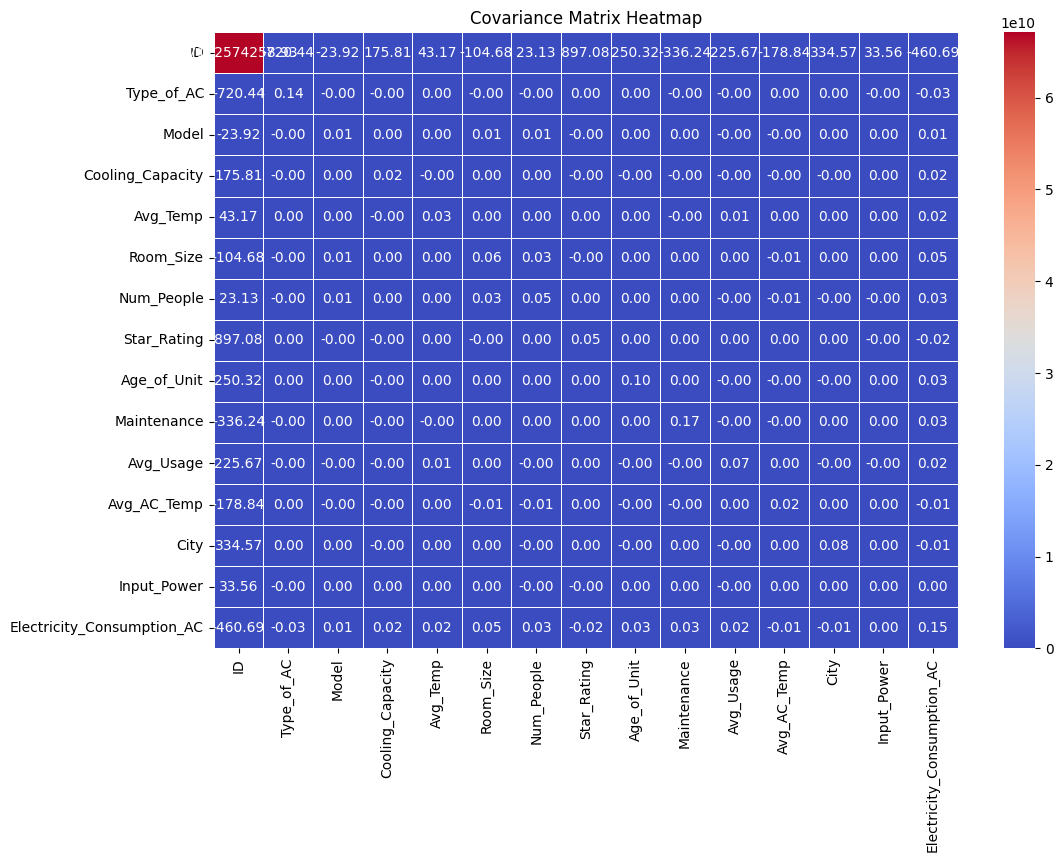

In [49]:

# Calculate the covariance matrix
cov_matrix = scaled_data.cov()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

In [68]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14929 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14929 non-null  int64  
 1   Type_of_AC                  14929 non-null  float64
 2   Model                       14929 non-null  float64
 3   Cooling_Capacity            14929 non-null  float64
 4   Avg_Temp                    14929 non-null  float64
 5   Room_Size                   14929 non-null  float64
 6   Num_People                  14929 non-null  float64
 7   Star_Rating                 14929 non-null  float64
 8   Age_of_Unit                 14929 non-null  float64
 9   Maintenance                 14929 non-null  float64
 10  Avg_Usage                   14929 non-null  float64
 11  Avg_AC_Temp                 14929 non-null  float64
 12  City                        13439 non-null  float64
 13  Input_Power                 142

In [90]:
scaled_data.head().fillna(0)

,ID,Type_of_AC,Model,Cooling_Capacity,Avg_Temp,Room_Size,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power,Electricity_Consumption_AC
0,795823,0.666667,0.034247,0.355161,0.724138,0.180393,0.022222,0.50,0.833333,0.0,0.086017,0.682627,0.916667,1.0,1.924
1,506848,1.000000,0.006849,0.367905,0.827586,0.124695,0.044444,0.75,0.166667,0.0,0.900180,0.622435,0.333333,1.0,1.341
2,441027,0.333333,0.191781,0.382175,0.241379,0.786213,0.800000,0.75,0.166667,0.0,0.027556,0.105767,0.000000,1.0,2.702
3,160677,1.000000,0.013699,0.049010,0.586207,0.096320,0.177778,0.75,0.000000,0.0,0.977195,0.405746,0.666667,1.0,1.541
4,902932,1.000000,0.102740,0.128567,0.620690,0.441824,0.155556,1.00,0.666667,0.0,0.838168,0.259462,0.000000,1.0,2.182


In [ ]:
print("Number of missing values in X_train:")
print(X_train.isnull().sum())

In [113]:
mean_absolute_errors = {}
mean_squared_errors = {}

Mean Absolute Error (MAE): 0.19
Mean Squared Error (MSE): 0.05


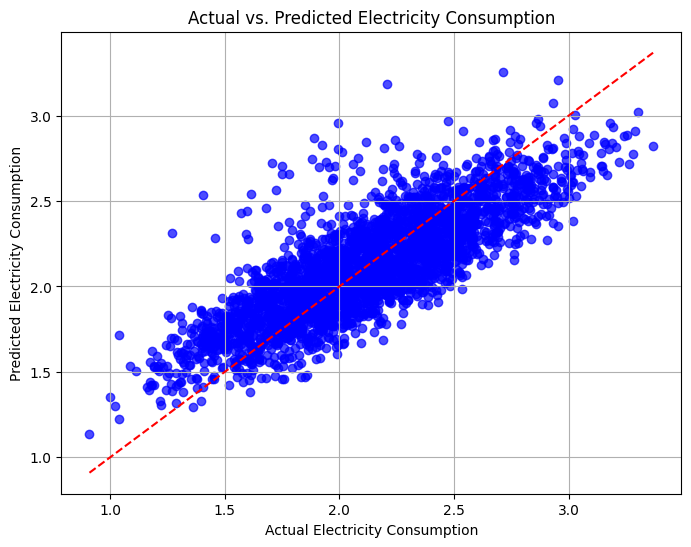

In [114]:

# Assuming 'Electricity_Consumption_AC' is the target variable
X = scaled_data.drop(columns=['ID', 'Electricity_Consumption_AC', "Input_Power", "City"])
y = scaled_data['Electricity_Consumption_AC']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

mean_absolute_errors["LinearRegression"] = mae
mean_squared_errors["LinearRegression"] = mse

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel("Actual Electricity Consumption")
plt.ylabel("Predicted Electricity Consumption")
plt.title("Actual vs. Predicted Electricity Consumption")
plt.grid(True)
plt.show()

GradientBoostingRegressor

Gradient Boosting Regression:
Mean Absolute Error (MAE): 0.17
Mean Squared Error (MSE): 0.04


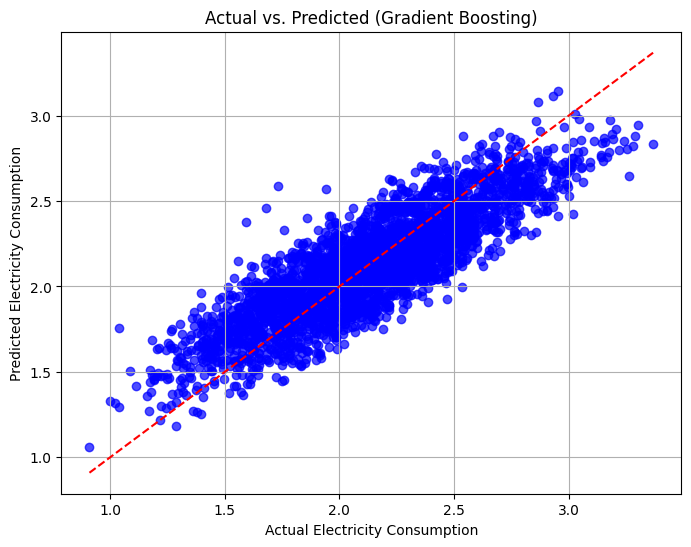

In [115]:


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_gb_pred = gb_model.predict(X_test)

# Calculate error metrics
mae_gb = mean_absolute_error(y_test, y_gb_pred)
mse_gb = mean_squared_error(y_test, y_gb_pred)

mean_absolute_errors["GradientBoostingRegressor"] = mae_gb
mean_squared_errors["GradientBoostingRegressor"] = mse_gb

print(f"Gradient Boosting Regression:")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_gb_pred, color='b', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel("Actual Electricity Consumption")
plt.ylabel("Predicted Electricity Consumption")
plt.title("Actual vs. Predicted (Gradient Boosting)")
plt.grid(True)
plt.show()

Support Vector Regression

Support Vector Regression (SVR):
Mean Absolute Error (MAE): 0.17
Mean Squared Error (MSE): 0.04


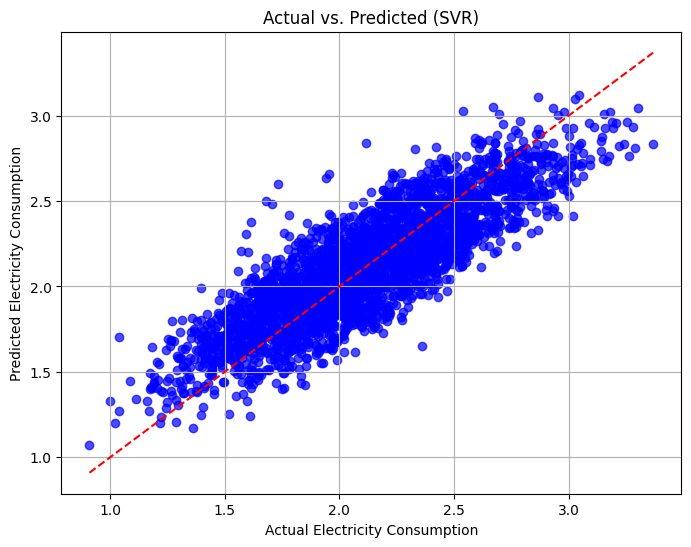

In [116]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Initialize and train the SVR model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_svr_pred = svr_model.predict(X_test)

# Calculate error metrics
mae_svr = mean_absolute_error(y_test, y_svr_pred)
mse_svr = mean_squared_error(y_test, y_svr_pred)

mean_absolute_errors["SVR"] = mae_svr
mean_squared_errors["SVR"] = mse_svr

print(f"Support Vector Regression (SVR):")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_svr_pred, color='b', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel("Actual Electricity Consumption")
plt.ylabel("Predicted Electricity Consumption")
plt.title("Actual vs. Predicted (SVR)")
plt.grid(True)
plt.show()


RandomForestRegressor


Random Forest Regression:
Mean Absolute Error (MAE): 0.18
Mean Squared Error (MSE): 0.05


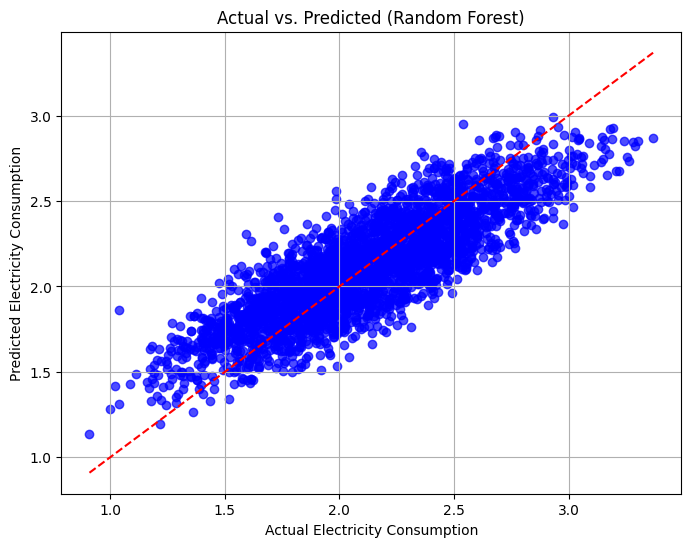

In [117]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_rf_pred = rf_model.predict(X_test)

# Calculate error metrics
mae_rf = mean_absolute_error(y_test, y_rf_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)



mean_absolute_errors["RandomForestRegressor"] = mae_rf
mean_squared_errors["RandomForestRegressor"] = mse_rf


print(f"Random Forest Regression:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_rf_pred, color='b', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel("Actual Electricity Consumption")
plt.ylabel("Predicted Electricity Consumption")
plt.title("Actual vs. Predicted (Random Forest)")
plt.grid(True)
plt.show()


In [118]:
print(mean_absolute_errors)
print(mean_squared_errors)

{'LinearRegression': 0.18728911017781033, 'GradientBoostingRegressor': 0.16985804920411632, 'SVR': 0.17321222175389356, 'RandomForestRegressor': 0.17765688881446756}
{'LinearRegression': 0.05497972199939021, 'GradientBoostingRegressor': 0.04240814337023584, 'SVR': 0.04455663240676677, 'RandomForestRegressor': 0.04678379045937711}


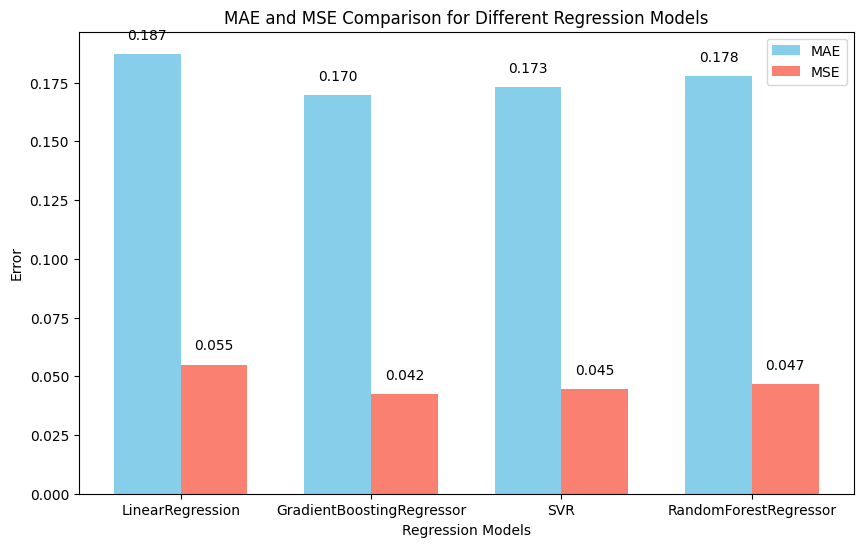

In [121]:
import matplotlib.pyplot as plt
import numpy as np

models = list(mean_absolute_errors.keys())
mae_values = list(mean_absolute_errors.values())
mse_values = list(mean_squared_errors.values())

bar_width = 0.35
x = np.arange(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, mae_values, bar_width, label='MAE', color='skyblue')
plt.bar(x + bar_width/2, mse_values, bar_width, label='MSE', color='salmon')

plt.xlabel('Regression Models')
plt.ylabel('Error')
plt.title('MAE and MSE Comparison for Different Regression Models')
plt.xticks(x, models)
plt.legend()
for i, value in enumerate(mae_values):
    plt.text(i - bar_width/2, value + 0.005, f'{value:.3f}', ha='center', va='bottom')
    plt.text(i + bar_width/2, mse_values[i] + 0.005, f'{mse_values[i]:.3f}', ha='center', va='bottom')

plt.show()